In [1]:
import numpy as np
import pandas as pd
from statsmodels import regression
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
def linreg(X,Y):
    # Running the linear regression
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    B0 = model.params[0]
    B1 = model.params[1]
    X = X[:, 1]

    # Return summary of the regression and plot results
    X2 = np.linspace(X.min(), X.max(), 100)
    Y_hat = X2 * B1 + B0
    plt.scatter(X, Y, alpha=1) # Plot the raw data
    plt.plot(X2, Y_hat, 'r', alpha=1);  # Add the regression line, colored in red
    plt.xlabel('X Value')
    plt.ylabel('Y Value')
    return model, B0, B1

array([10.07320391,  0.4953706 ])

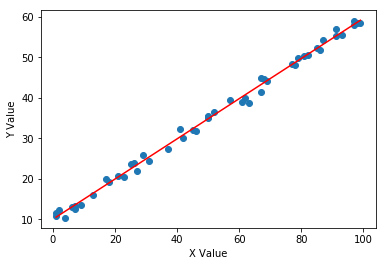

In [5]:
n=50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0,1,n)

Y = 10 + 0.5 * X + epsilon

linreg(X,Y)[0].params

<ErrorbarContainer object of 3 artists>

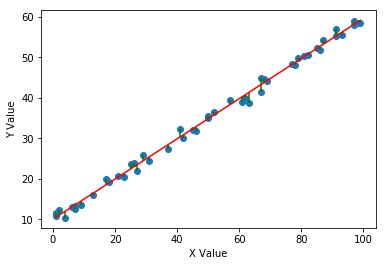

In [6]:
model, B0, B1 = linreg(X,Y)

residuals = model.resid
plt.errorbar(X,Y, xerr=0, yerr = [residuals, 0*residuals], linestyle='None', color='g')

In [7]:
print(model.resid)

[-0.68918043 -0.84917923 -1.65868132  1.10879058 -0.91059708 -0.0999611
  1.46961273  1.19318711 -1.07209085  0.02760064 -0.65958295 -1.80050259
 -0.27885505 -1.03453782  0.74641451  1.11626255  0.48152808 -0.93055881
 -1.24375635  0.3312905  -0.89586166 -1.03610729  1.88740135  1.05885264
  0.09717845 -0.0651129  -2.67445918  0.63399662  1.36335998  1.73174072
  1.43294296  0.05470443 -0.11557445  0.20160113  0.34575939 -0.88667124
  0.28070202  0.78464323 -0.40167448  1.9089543   0.99687737  0.93168308
  0.24809197  0.09608548 -1.58632692 -0.9356818   0.49898172 -0.21221618
 -0.57777636 -0.4132975 ]


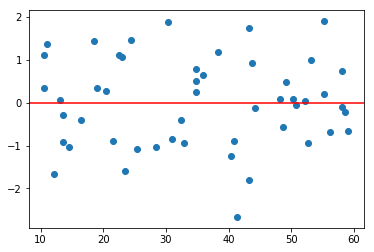

In [14]:
plt.scatter(model.predict(), model.resid)
plt.axhline(0, color='red')



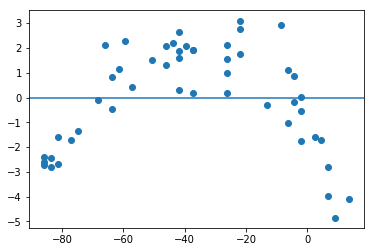

In [16]:
n=50
X = np.random.randint(0,50,n)
epsilon = np.random.normal(0,1,n)
Y_nonlinear = 10-X**1.2 + epsilon

model = sm.OLS(Y_nonlinear, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals)
plt.axhline(0)

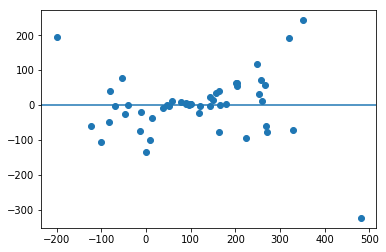

In [18]:
n=50
X=np.random.normal(0,100,n)
epsilon = np.random.normal(0,1,n)
Y_heteroscedastic = 100 + 2*X + epsilon * X

model  = sm.OLS(Y_heteroscedastic, sm.add_constant(X)).fit()

plt.scatter(model.predict(), model.resid)
plt.axhline(0)

In [20]:
bp = smd.het_breuschpagan(model.resid,model.model.exog)[1]
print(bp)

0.006648130201352187


In [22]:
print(Y_heteroscedastic)
np.diff(Y_heteroscedastic)

[ 511.21695152  208.95412629  101.72120157  258.69202506  101.0873331
  284.09129253  595.39103519  204.00453323   23.60052306  157.47364681
 -132.43239242 -134.97143563  -24.48287081   96.79655248  128.2217614
   70.23220922  182.5877062    86.31183445   95.34695596  -32.4084924
  -89.59464327 -207.66882363   93.5122208    47.55589846  164.53859052
   48.15666215 -184.17007348  -40.50745307  102.95589565  118.89956803
   -4.08629589  -75.04044315  142.94120549  -42.20891948  328.83265089
  -90.46168951  166.65551557  189.91347488  193.29566314  265.80307295
  271.14016513  268.87383051   29.0506786    86.39370085  364.7119944
  168.43066891  -71.64874645   95.85419108  257.92989568  324.44415938]


array([-302.26282523, -107.23292472,  156.97082348, -157.60469195,
        183.00395943,  311.29974266, -391.38650196, -180.40401017,
        133.87312375, -289.90603923,   -2.53904321,  110.48856482,
        121.2794233 ,   31.42520892,  -57.98955218,  112.35549698,
        -96.27587175,    9.03512151, -127.75544836,  -57.18615088,
       -118.07418035,  301.18104442,  -45.95632233,  116.98269205,
       -116.38192836, -232.32673563,  143.6626204 ,  143.46334872,
         15.94367237, -122.98586392,  -70.95414726,  217.98164864,
       -185.15012498,  371.04157037, -419.2943404 ,  257.11720508,
         23.25795931,    3.38218826,   72.50740982,    5.33709217,
         -2.26633462, -239.82315191,   57.34302225,  278.31829354,
       -196.28132549, -240.07941536,  167.50293753,  162.0757046 ,
         66.5142637 ])

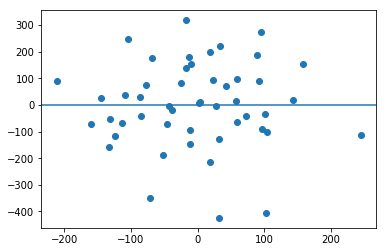

In [24]:
model  = sm.OLS(np.diff(Y_heteroscedastic), sm.add_constant(X[1:])).fit()

plt.scatter(model.predict(), model.resid)
plt.axhline(0)

In [25]:
bp = smd.het_breuschpagan(model.resid,model.model.exog)[1]
print(bp)

0.4099863875944345


[6.23679406 5.34211474 4.62223575 5.55563826 4.61598483 5.64929564
 6.38921839 5.31814222 3.16126888 5.05925812        nan        nan
        nan 4.57261138 4.85376128 4.25180703 5.20723064 4.45796672
 4.55752241        nan        nan        nan 4.53809213 3.86190583
 5.10314514 3.87445949        nan        nan 4.6343007  4.77827917
        nan        nan 4.9624334         nan 5.79554896        nan
 5.1159289  5.24656857 5.26422095 5.58275571 5.6026359  5.59424224
 3.36904184 4.45891477 5.89910799 5.1265242         nan 4.56282819
 5.55268783 5.78211344]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


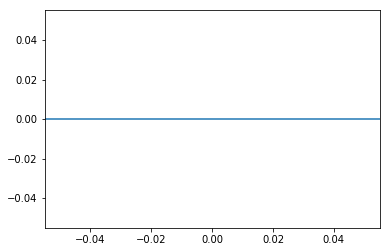

In [32]:
print(np.log(Y_heteroscedastic))
model  = sm.OLS(np.log(Y_heteroscedastic), sm.add_constant(X)).fit()

plt.scatter(model.predict(), model.resid)
plt.axhline(0)

In [36]:
bc = stats.boxcox(np.abs(Y_heteroscedastic))[0]

print(bc)

[20.64660608 14.6022116  10.87898473 15.8873051  10.85036568 16.48013224
 21.86588561 14.46349488  5.56411301 13.03321453 12.14226273 12.23749875
  5.6687137  10.65340048 11.98159143  9.28075511 13.8357717  10.14612939
 10.58553628  6.5110699  10.3092008  14.56640353 10.49864193  7.79639291
 13.26717777  7.84127469 13.88379066  7.23890303 10.93438942 11.61284159
  1.79080024  9.55234113 12.52884493  7.37909543 17.4432399  10.35159992
 13.33596692 14.05579204 14.15545366 16.05707481 16.18250227 16.12944506
  6.17325276 10.15024618 18.15380276 13.39319993  9.36202874 10.60936117
 15.86892509 17.35281645]


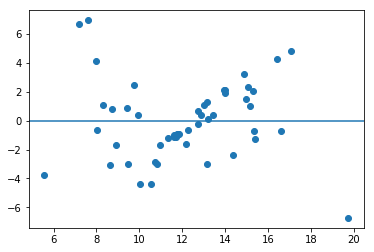

In [39]:
model = sm.OLS(bc, sm.add_constant(X)).fit()

plt.scatter(model.predict(), model.resid)
plt.axhline(0)

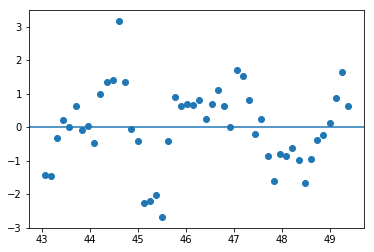

In [41]:
n=50
X = np.linspace(0,n,n)
Y_autocorrelated = np.zeros(n)
Y_autocorrelated[0] = 50
for t in range(1,n):
    Y_autocorrelated[t] = Y_autocorrelated[t-1] + np.random.normal(0,1)
    
model = sm.OLS(Y_autocorrelated, sm.add_constant(X)).fit()

plt.scatter(model.predict(), model.resid)
plt.axhline(0)

In [44]:
ljung_box = smd.acorr_ljungbox(model.resid, lags=10)
ljung_box[1]

if any(ljung_box[1] <0.05):
    print('the residuals are autocorrelated')

the residuals are autocorrelated


In [48]:
Y_autocorrelated_diff = np.diff(Y_autocorrelated)
model = sm.OLS(Y_autocorrelated_diff, sm.add_constant(X[1:])).fit()

ljung_box = smd.acorr_ljungbox(model.resid, lags=10)
ljung_box[1]

if any(ljung_box[1] <0.05):
    print('the residuals are autocorrelated')
else:
    print('no autocorrelation')

no autocorrelation


In [49]:

!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


beta 1.954150073799473


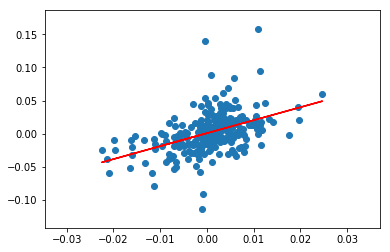

In [54]:
asset = pdr.data.DataReader('TSLA', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]
benchmark = pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2014,1,1), end=datetime(2015,1,1)).iloc[:, -1]

r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

model = sm.OLS(r_a, sm.add_constant(r_b)).fit()

A_hat = model.params[0] + model.params[1] * r_b

plt.scatter(r_b, r_a, alpha=1)
plt.plot(r_b, A_hat, 'r', alpha=1)

print('beta', model.params[1])


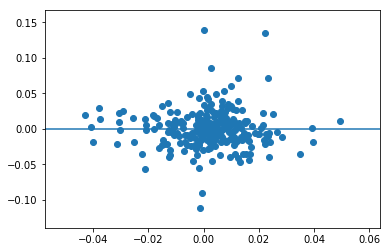

In [56]:
residuals = model.resid

plt.scatter(model.predict(), residuals)

plt.axhline(0)

In [57]:
bp_test = smd.het_breuschpagan(residuals, model.model.exog)
print(bp_test[1])

0.370423350126755


In [58]:
ljung_box = smd.acorr_ljungbox(r_a)
print(ljung_box[1])

[0.90046868 0.89838337 0.96494274 0.96419892 0.9083023  0.9232505
 0.9600223  0.97577273 0.98189717 0.98670134 0.99062236 0.96877482
 0.90348376 0.91250794 0.93484413 0.86923578 0.89166596 0.91982789
 0.9387321  0.87491806 0.87515658 0.90568978 0.88451056 0.91127054
 0.8690193  0.89100832 0.90805576 0.92551484 0.93020099 0.94722545
 0.90320671 0.92418267 0.93477952 0.93705876 0.93750783 0.95131279
 0.9625346  0.96240794 0.94630687 0.95686839]
